In [ ]:

Thresholding (Eşikleme)
Thresholding, bir görüntüdeki pikselleri belirli bir değerin üzerinde veya altında olacak şekilde ikili hale getirme işlemidir. Yani, belirli bir eşik değeri kullanarak görüntüyü siyah-beyaz hale getiririz. Belirlenen eşik değeri üzerindeki pikseller beyaz (1), altındaki pikseller ise siyah (0) yapılır.

Mantığı: Görüntüdeki parlaklık değerlerine göre piksellerin ayrılması. Eşikleme, genellikle bir nesneyi arka plandan ayırmak için kullanılır. Eşik değeri, piksellerin ne zaman beyaz ya da siyah olacağına karar verir.

Kullanım Amacı: Özellikle objelerin kenarlarını belirlemek veya bir görüntüde belirli bir parlaklık seviyesini izole etmek istediğimizde kullanılır. Örneğin, bir el yazısını kağıt zemininden ayırmak veya yüz tespitinde belirli alanları izole etmek için.

Örnek: Bir görüntüdeki pikselleri 127 eşik değeriyle siyah ve beyaz olarak bölmek.

python
Kodu kopyala
# Grayscale (gri tonlamalı) görüntüyü oku
gray_img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Eşikleme işlemi
_, threshold_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

cv2.imshow('Threshold Image', threshold_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
Farkları ve Kullanım Alanları:
Maskeleme: Belirli bir bölgeyi seçmek, işlem yapmak istediğiniz bölgeyi belirlemek için kullanılır.
Thresholding: Görüntüdeki parlaklık seviyelerini ayırarak nesneleri veya bölgeleri belirgin hale getirmek için kullanılır.
Her iki yöntem de görüntü işleme projelerinde yaygın olarak kullanılır, özellikle nesne tespiti, kenar bulma ve segmentasyon gibi işlemlerde.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
img=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\rainbow.jpg")
img1=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\rainbow.jpg",0)

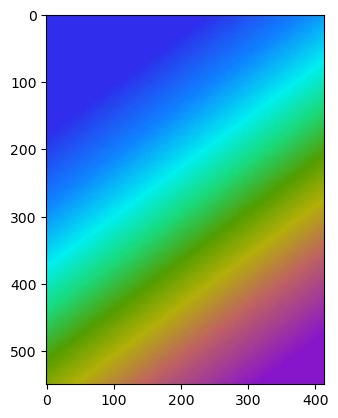

In [8]:
plt.imshow(img) #eğer ikinci parametre olarak 0 girersek gri tonlamalı okuyabiliriz

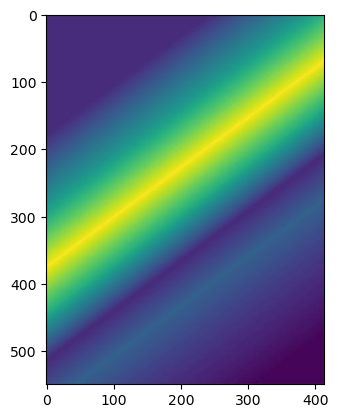

In [10]:
plt.imshow(img1)

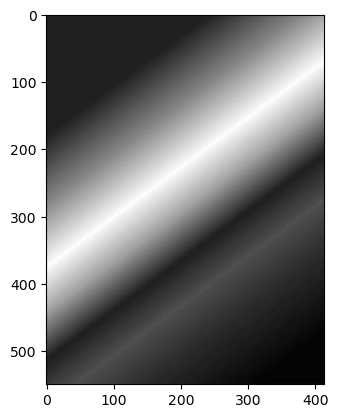

In [11]:
plt.imshow(img1,cmap="gray")

In [13]:
#eşik türlerine bakacağız 
ret,thresh=cv2.threshold(img1,127,255,cv2.THRESH_BINARY)#2 parametre biri eşik değeri diğer max değer  belli değerin altındakileri syah veya beyaz yani 0 veya 1
#üsttekileri de öyle  biz 255in yarısı 127 alcaz  THRESH BİNARYLE 2 LİK SAYI SİSTEMİNDE YAZCAZ 1 DEN 7 YE 

In [14]:
ret

127.0

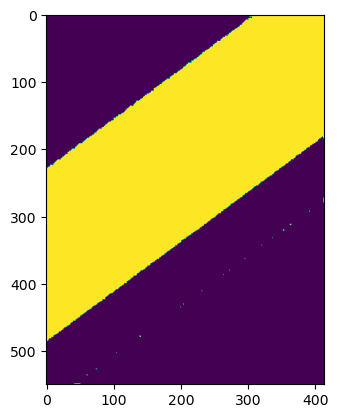

In [16]:
plt.imshow(thresh)

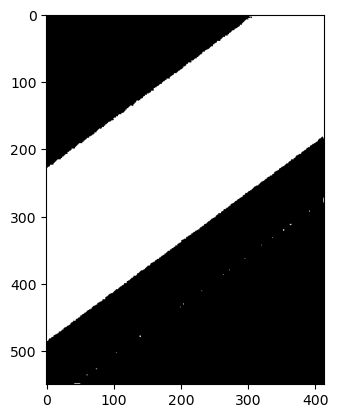

In [17]:
plt.imshow(thresh,cmap="gray") #tüm değerler ya 0 ya 255 

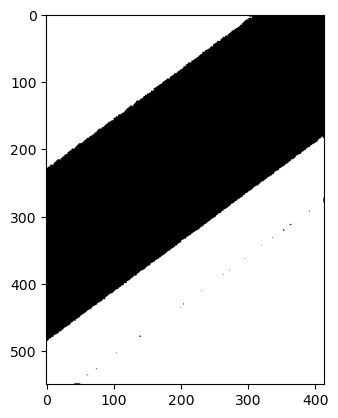

In [19]:
ret,thresh=cv2.threshold(img1,127,255,cv2.THRESH_BINARY_INV) #YUKARIDAKİNİN TERSİDİR BEYAZKEN SİYAH SİYAHKEN BEYAZ 
plt.imshow(thresh,cmap="gray")# mesela 128 geçerse 0  altındaysa 1

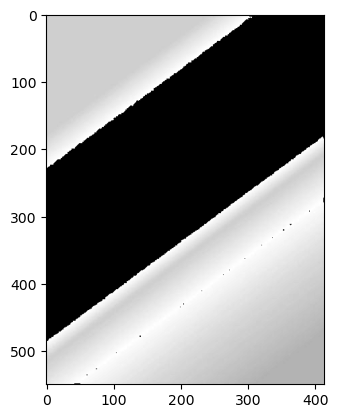

In [21]:
ret,thresh=cv2.threshold(img1,127,255,cv2.THRESH_TOZERO_INV) #eşiğe gidildiyse değerler aynı kalsın gidilemiyorsa 0  
plt.imshow(thresh,cmap="gray")

In [22]:
img=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\crossword.jpg",0)

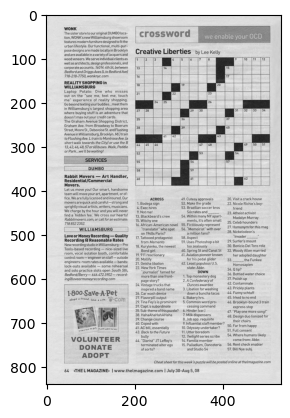

In [24]:
plt.imshow(img,cmap="gray")

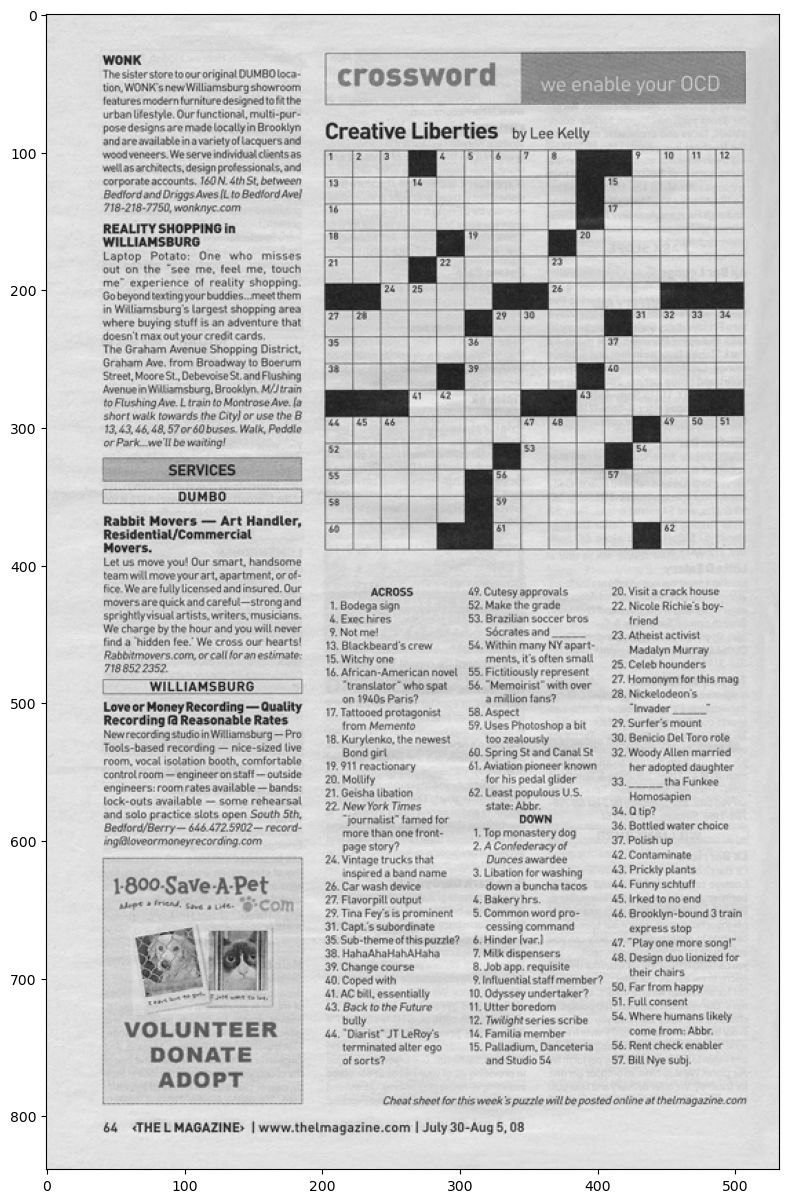

In [25]:
def showme(img):
    fig=plt.figure(figsize=(15,15))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="gray")

showme(img)
#MÜREkkep olan her yer siyah olmayan diğer yerler beyaz dersek bunun için binary kullanılabilir

In [26]:
ret1,thr=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

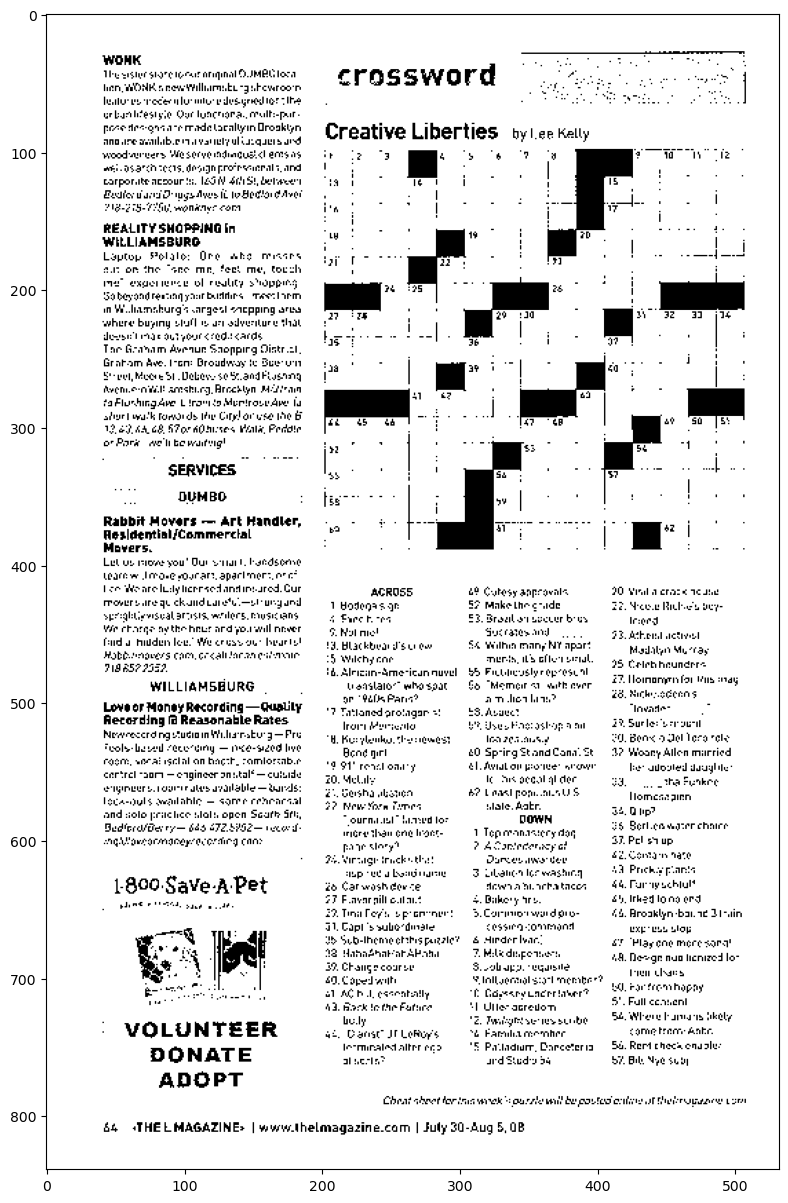

In [29]:
showme(thr) #okey ama hem kalitesizleşti hemde gri alanlarda siyah kalmasını istediğimiz alanlar beyazlaştı bunu 
#düzeltmek lazım
#daha yüksek eşik değere geçersek daha fazla mürekkep alırız yani koyu grileri daha fazla yakalayabiliyor

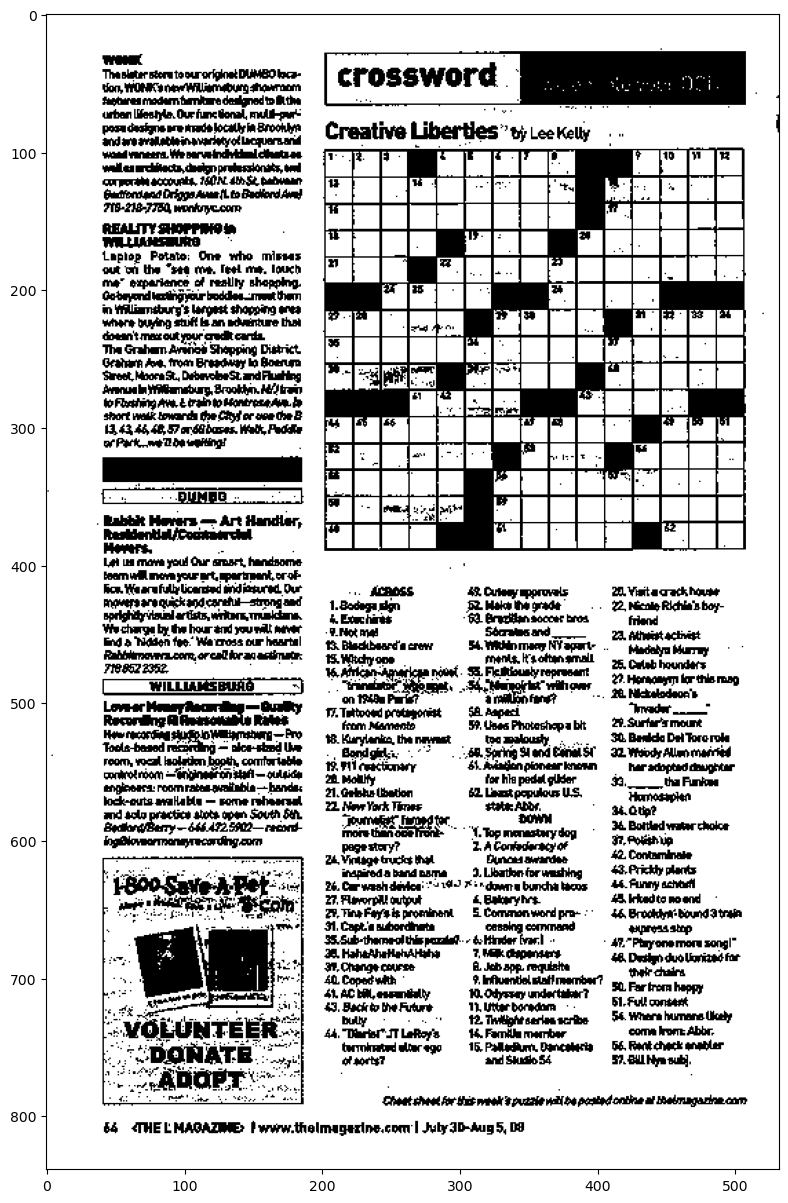

In [31]:
ret1,thr=cv2.threshold(img,200,255,cv2.THRESH_BINARY)
showme(thr)

In [ ]:
Eşik Değerini Artırınca Ne Olur?
Eğer düşük bir eşik değeri (örneğin, 50) seçerseniz, görüntüde çok fazla piksel beyaz olur, çünkü çoğu pikselin parlaklık değeri 50’nin üzerindedir.
Eşik değerini artırdığınızda (örneğin, 127'den 200'e yükseltirseniz), görüntüde daha az piksel beyaz kalır.
Çünkü artık daha fazla piksel bu yeni eşik değerinin altında kalır ve siyah (0) olarak atanır.

In [36]:
th2=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8)

In [ ]:
Parametrelerin Açıklaması:
img:

Bu parametre, üzerinde eşikleme işlemi yapılacak gri tonlamalı görüntüdür.
Eğer renkli bir görüntü üzerinde çalışıyorsanız, önce gri tonlamaya çevrilmesi gerekir.
python
Kodu kopyala

gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
255 (maksimum değer):

Bu, pikselin eşik değerinin üstünde olması durumunda atanacak maksimum değerdir. 
Yani, eğer bir piksel adaptif eşikleme tarafından belirlenen eşik değerinin üzerinde ise, bu piksele 255 (beyaz) değeri atanır. 
Bu değer genellikle 255 (beyaz) olur, ama farklı bir değer seçmek de mümkündür.


cv2.ADAPTIVE_THRESH_MEAN_C (adaptif eşikleme yöntemi):

Bu, kullanılan adaptif eşikleme algoritmasını belirtir. Burada iki seçenek vardır:
cv2.ADAPTIVE_THRESH_MEAN_C: Eşik değeri, her pikselin çevresindeki komşu piksellerin ortalama değeri ile belirlenir.
cv2.ADAPTIVE_THRESH_GAUSSIAN_C: Eşik değeri, komşu piksellerin Gaussian (ağırlıklı ortalama) ile belirlenir. Bu durumda merkezi piksellere daha fazla ağırlık verilir.
cv2.ADAPTIVE_THRESH_MEAN_C kullanıldığında, her pikselin çevresindeki küçük bir bölgenin ortalama değeri alınır ve bu ortalama, pikselin kendi eşik değeri olarak belirlenir.



cv2.THRESH_BINARY (eşikleme tipi):

Bu parametre, eşikleme sonucunda ne yapılacağını belirler. cv2.THRESH_BINARY, 
klasik ikili eşikleme (binary thresholding) yöntemidir. Piksel değeri eşik değerinin üzerinde ise maksimum değeri (255) alır,
altında ise 0 (siyah) değerini alır.

11 (blok boyutu):

Bu, her bir piksel için eşik değerini hesaplamak amacıyla kullanılan komşu piksellerin büyüklüğünü (block size) belirler. 11x11 boyutunda bir komşuluk kullanıldığını gösterir. Yani, her pikselin etrafındaki 11x11'lik bir alanın ortalaması alınır ve bu ortalama, o pikselin eşik değeri olarak kullanılır.

Daha büyük bir blok boyutu, daha geniş bir alanın ortalamasını alır ve dolayısıyla daha yumuşak geçişler sağlar; daha küçük blok boyutları ise yerel bölgelerde daha detaylı eşikleme sağlar.


8 (sabit C değeri):

Bu parametre, ortalamadan çıkarılacak sabit bir sayıdır. C değeri, ortalama değerden çıkarılarak eşik değeri belirlenir. Bu, görüntüdeki daha ince detayları vurgulamak veya daha sert bir eşikleme uygulamak için kullanılabilir.

Eğer bu değeri artırırsanız, daha fazla piksel siyah olur, çünkü ortalamadan büyük bir sayı çıkarılacağı için eşik değeri düşer.

Adaptif Eşiklemenin Avantajı:
Klasik thresholding, görüntünün her yerine aynı eşik değerini uygular. Ancak bu, özellikle gölge, aydınlık farklılıkları veya yerel varyasyonlar olan görüntülerde iyi sonuç vermeyebilir. Adaptif eşikleme ise her bir pikselin etrafındaki yerel bölgeyi dikkate alarak eşik değeri hesapladığı için, daha dinamik ve yerel bir eşikleme sağlar. Bu yöntem, farklı ışık koşullarına sahip görüntülerde daha iyi sonuç verir.

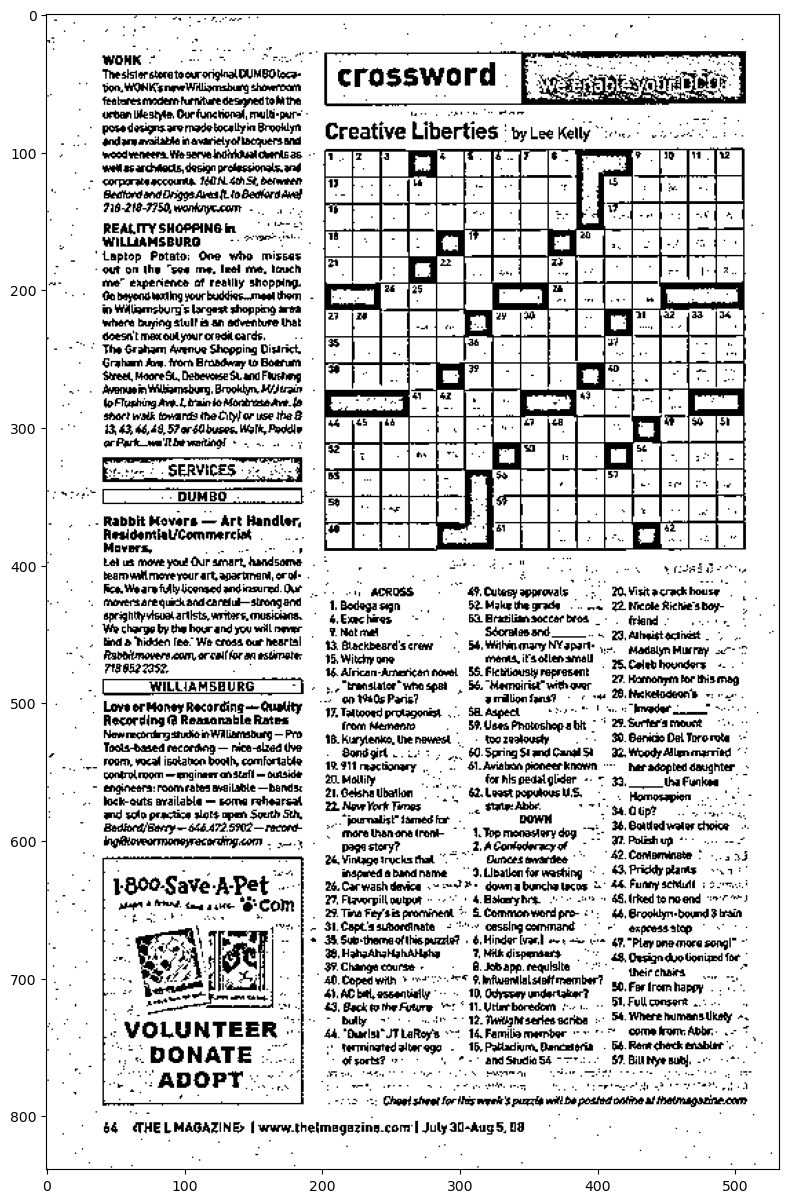

In [37]:
showme(th2)

In [42]:
blended=cv2.addWeighted(src1=thr,alpha=0.6,src2=th2,beta=0.4,gamma=0)

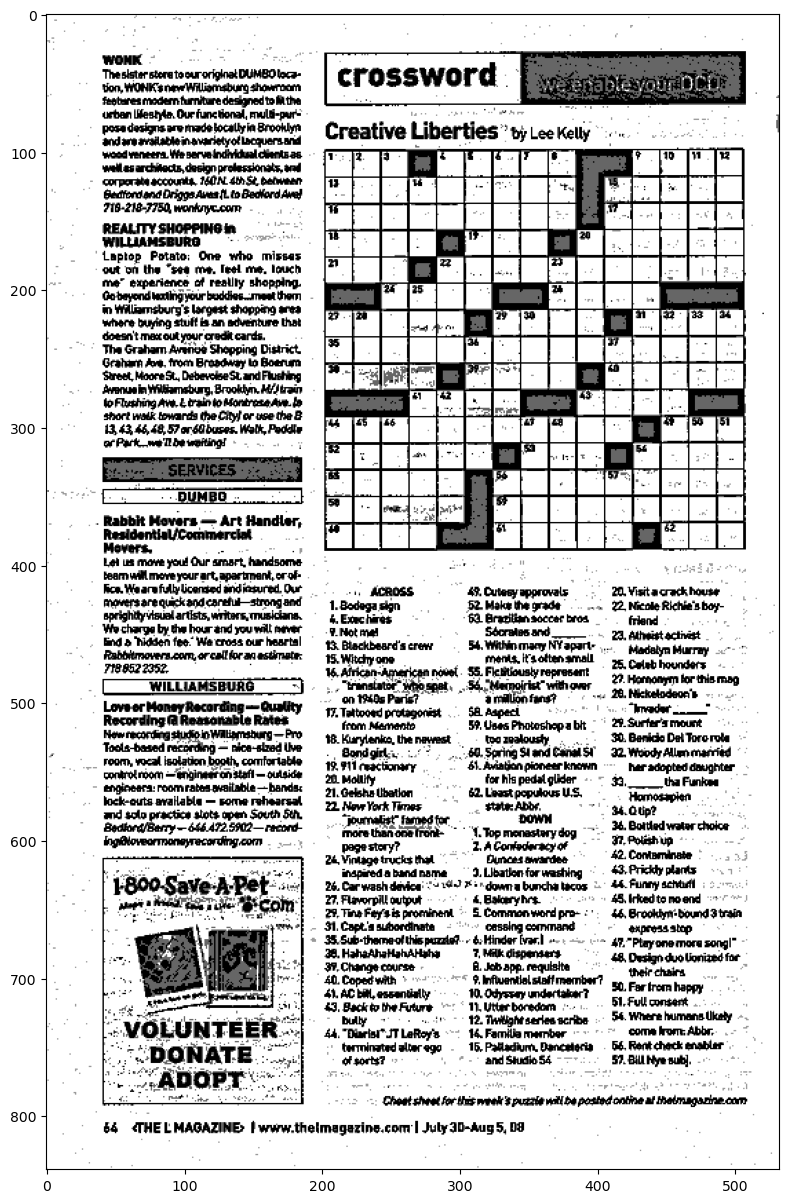

In [44]:
showme(blended)

In [ ]:

Bu satırda kullanılan cv2.addWeighted() fonksiyonu, iki görüntüyü belirli ağırlıklarla birleştirerek harmanlar (blend). Şimdi bu işlemi ve ardından neden yapılabileceğini detaylıca açıklayalım.

Fonksiyonun Yapısı:
python
Kodu kopyala
blended = cv2.addWeighted(src1=th1, alpha=0.6, src2=th2, beta=0.4, gamma=0)
Bu satırda, iki farklı görüntü (th1 ve th2) ağırlıklarla birleştiriliyor. Her iki görüntüden belirli oranlarda alınıp bir araya getiriliyor ve son bir harmanlanmış görüntü (blended) elde ediliyor.

Parametrelerin Açıklaması:
src1=th1:

Bu, birinci kaynak görüntüdür (th1). Örneğin, bu görüntü klasik thresholding (eşikleme) ile elde edilmiş bir görüntü olabilir.
alpha=0.6:

Bu, birinci görüntünün (th1) ağırlık katsayısıdır. Yani, birinci görüntünün %60'ı (0.6) harmanlanmış görüntüye katılır.
src2=th2:

Bu, ikinci kaynak görüntüdür (th2). Örneğin, bu görüntü adaptif thresholding (eşikleme) ile elde edilmiş olabilir.
beta=0.4:

Bu, ikinci görüntünün (th2) ağırlık katsayısıdır. Yani, ikinci görüntünün %40'ı (0.4) harmanlanmış görüntüye katılır.
gamma=0:

Bu, bir sabit değerdir. Genellikle parlaklık veya kontrast ayarı eklemek için kullanılır. gamma=0 olduğunda, ek bir değişiklik yapılmaz.
Mantık: Neden İki Görüntüyü Harmanlıyoruz?
Bu tür bir ağırlıklı harmanlama işlemi, iki farklı işlenmiş görüntüyü birleştirerek her iki görüntünün avantajlarından yararlanmayı sağlar. İşlemden sonra ortaya çıkan görüntü, her iki görüntüdeki önemli özellikleri bir arada sunar.

Bu durumda:

th1: Klasik thresholding ile elde edilmiş bir görüntü olabilir. Bu tür görüntüler, genel aydınlatma farklılıklarına karşı duyarlı olabilir, ancak belirli alanları daha net ayırabilir.
th2: Adaptif thresholding ile elde edilen görüntüdür. Bu yöntem, yerel bölgeye göre dinamik bir eşik belirlediği için, özellikle farklı ışık koşullarında daha dengeli sonuçlar verebilir.
Harmanlama yaparak, hem klasik thresholding'in hem de adaptif thresholding'in sonuçlarını birleştirmiş olursunuz. Böylece:

Klasik thresholding'in net çizgileri ve kontrastı korunurken,
Adaptif thresholding'in yerel ışık farklarını düzeltme yeteneği de harmanlanmış görüntüye katılır.
Bu sayede, görüntüde daha dengeli ve detaylı bir sonuç elde edebilirsiniz.

Örnek Senaryo:
Bir yüz tanıma uygulaması geliştirdiğinizi varsayalım. Yüzde gölgeli alanlar ve parlak alanlar olabilir. Tek başına klasik thresholding, çok parlak alanlarda yüz özelliklerini kaybedebilir, ancak gölgeli alanları iyi vurgular. Adaptif thresholding ise gölgeleri daha iyi düzeltebilir, ancak parlak alanlarda detayı azaltabilir. İkisini birleştirerek, yüzün her iki bölgesinde de detayları koruyabilirsiniz.

Özet:
cv2.addWeighted() ile iki farklı eşikleme yöntemiyle elde edilen görüntüler belirli oranlarda harmanlanıyor.
alpha ve beta parametreleri, her iki görüntünün ağırlıklarını belirler. Bu ağırlıklarla, her iki görüntüdeki önemli özellikler birleştirilir.
Bu işlem, görüntüdeki hem yerel aydınlık farklarını düzeltmek hem de daha belirgin ayrıntılar elde etmek için yapılır.